In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

In [2]:
import os
os.chdir(r'C:\Users\virinchi\Desktop\Titanic_Kaggle')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# set the index to passengerId
train = train.set_index('PassengerId')
#load the test dataset
#test = pd.read_csv('test.csv')

In [6]:
test = test.set_index('PassengerId')

In [7]:
#inspection
print(train.shape)

(891, 11)


In [8]:
#checking datatypes
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
#looking for missing values
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
#checking unique values in each column
train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [12]:
#Univariate analysis
train.Survived.value_counts(normalize=True)


0    0.616162
1    0.383838
Name: Survived, dtype: float64

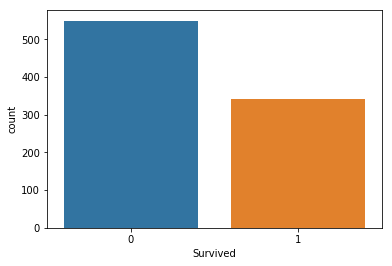

In [10]:
survived_plot = sns.countplot(x='Survived', data=train)
plt.show()

In [11]:
train.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

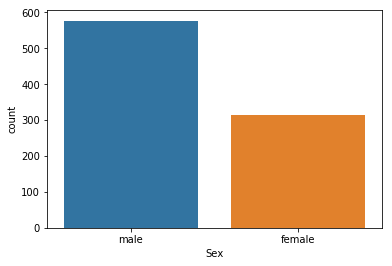

In [12]:
#EDA on predictors
#The sex feature
sns.countplot(x='Sex', data=train)
plt.show()

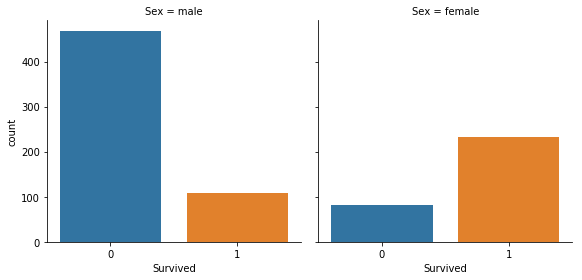

In [13]:
#How did the sexes fare in survival?
sns.factorplot(x='Survived', col='Sex', kind='count', data=train)
plt.show()

In [14]:
# a look at the related numbers
train.groupby(['Pclass']).Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [18]:
pd.crosstab(train['Sex'],train['Survived'],normalize=True,margins=True)

Survived,0,1,All
Sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


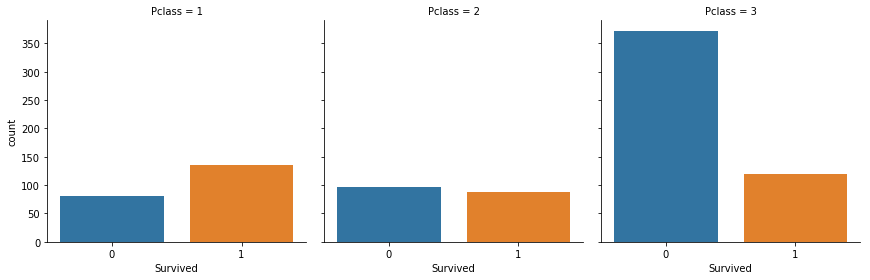

In [18]:
#Pclass vs survival
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train)
plt.show()

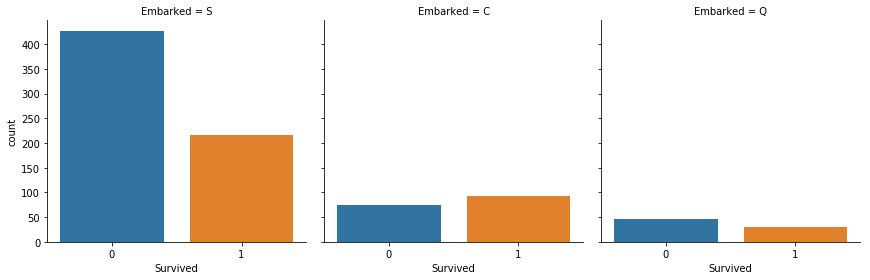

In [19]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train)
plt.show()

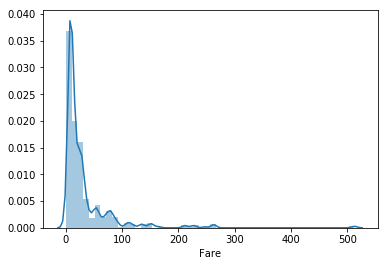

In [21]:
#EDA on numeric variables
sns.distplot(train.Fare)
plt.show()

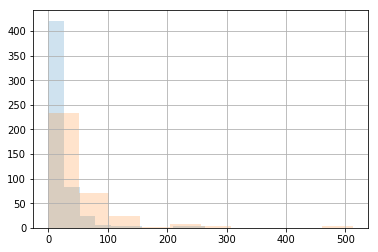

In [21]:
train.groupby('Survived').Fare.hist(alpha=0.21)
plt.show()

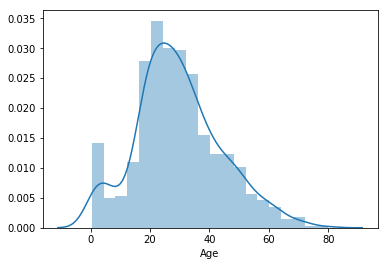

In [23]:
train_drop = train.drop(['Cabin'],axis=1,inplace=False)
train_drop = train_drop.dropna()
sns.distplot(train_drop.Age, kde=True)
plt.show()

In [42]:
train_drop.shape

(712, 10)

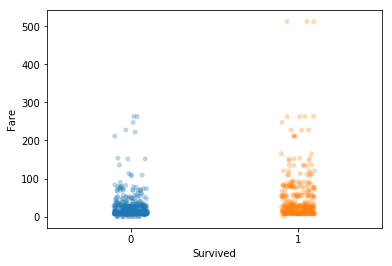

In [24]:
#strip plot & a swarm plot
sns.stripplot(x='Survived', y='Fare', data=train, alpha=0.3, jitter=True)
plt.show()

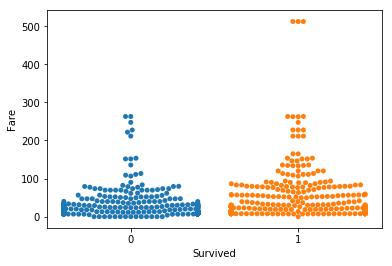

In [25]:
sns.swarmplot(x='Survived', y='Fare', data=train)
plt.show()

In [26]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
print(train.nunique(),train.dtypes,sep = '\n')

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64
Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [28]:
#Imputation
from sklearn.preprocessing import Imputer
for column in ['Cabin','Embarked']:
    mode_train = train[column].value_counts().index[0]
    train[column] = train[column].fillna(mode_train)
    mode_test = test[column].value_counts().index[0]
    test[column] = test[column].fillna(mode_test)

median_imp = Imputer(missing_values='NaN',strategy='median',axis=0,copy=False)
median_imp.fit_transform((train['Age']).values.reshape(-1, 1))
median_imp.fit_transform((test['Age']).values.reshape(-1, 1))
median_imp.fit_transform((test['Fare']).values.reshape(-1, 1))
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [29]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [30]:
train1 = train.drop(['Name','Ticket','Cabin'],axis=1,inplace=False)
test1 = test.drop(['Name','Ticket','Cabin'], axis = 1, inplace=False)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 102.6+ KB


In [31]:
cat_cols = ['Survived','Pclass','Sex','Embarked']
for col in cat_cols:
    train1[col] = train1[col].astype('category')
    if col == 'Survived':
        continue
    test1[col] = test1[col].astype('category')

In [32]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null category
Pclass      891 non-null category
Sex         891 non-null category
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null category
dtypes: category(4), float64(2), int64(2)
memory usage: 78.7 KB


In [33]:
dum_cols = cat_cols[1:]

In [34]:
train1 = pd.get_dummies(train1,columns = dum_cols,drop_first = True,prefix_sep = '_')
test1 = pd.get_dummies(test1,columns = dum_cols,drop_first = True,prefix_sep = '_')

In [35]:
train1.shape

(891, 10)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e5)
X = train1.drop('Survived',axis=1,inplace=False)
Y = train1['Survived']
model.fit(X,Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [37]:
train_preds = model.predict(X)
test_preds = model.predict(test1)

In [38]:
#confustion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(Y, train_preds)
print(confusion_matrix)
print(classification_report(Y, train_preds))

[[477  72]
 [102 240]]
             precision    recall  f1-score   support

          0       0.82      0.87      0.85       549
          1       0.77      0.70      0.73       342

avg / total       0.80      0.80      0.80       891



In [60]:
test1.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [39]:
submission = pd.DataFrame(test_preds,index=test1.index,columns=['Survived'])
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [62]:
submission.to_csv('submission.csv',index=True)

In [40]:
from sklearn import tree
DTmodel = tree.DecisionTreeClassifier(criterion = 'entropy')
DTmodel.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
DT_train_preds = DTmodel.predict(X)
DT_test_preds = DTmodel.predict(test1)

#confustion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(Y, DT_train_preds)
print(confusion_matrix)
print(classification_report(Y, DT_train_preds))

[[547   2]
 [ 16 326]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       549
          1       0.99      0.95      0.97       342

avg / total       0.98      0.98      0.98       891



In [212]:
submission1 = pd.DataFrame(DT_test_preds,index=test1.index,columns=['Survived'])
submission1.to_csv('submission1.csv',index=True)

In [43]:
from sklearn.externals.six import StringIO  
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTmodel, out_file=dot_data,filled=True, feature_names = X.columns,
                class_names=['0','1'], rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
i = Image(graph.create_png())
display(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [44]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier)

In [46]:
RF_model = RandomForestClassifier()

In [47]:
RF_model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
RF_train_preds = RF_model.predict(X)
RF_test_preds = RF_model.predict(test1)

#confustion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(Y, RF_train_preds)
print(confusion_matrix)
print(classification_report(Y, RF_train_preds))

[[541   8]
 [ 19 323]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       549
          1       0.98      0.94      0.96       342

avg / total       0.97      0.97      0.97       891



In [78]:
submission_RF = pd.DataFrame(Ada_test_preds,index=test1.index,columns=['Survived'])
submission.to_csv('submission_RF.csv',index=True)

In [75]:
Ada_model = AdaBoostClassifier(learning_rate = 0.8,n_estimators = 20,algorithm='SAMME.R')

In [76]:
Ada_model.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.8, n_estimators=20, random_state=None)

In [77]:
Ada_train_preds = Ada_model.predict(X)
Ada_test_preds = Ada_model.predict(test1)

#confustion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(Y, Ada_train_preds)
print(confusion_matrix)
print(classification_report(Y, Ada_train_preds))

[[479  70]
 [ 88 254]]
             precision    recall  f1-score   support

          0       0.84      0.87      0.86       549
          1       0.78      0.74      0.76       342

avg / total       0.82      0.82      0.82       891



In [79]:
submission_Ada = pd.DataFrame(Ada_test_preds,index=test1.index,columns=['Survived'])
submission.to_csv('submission_Ada.csv',index=True)